In [ ]:
# Importação das bibliotecas necessárias 
import pandas as pd # fornece ferramentas para análise e manipulação de dados.
import numpy as np # destinada a realizar operações em arrays multidimensionais.
import matplotlib.pyplot as plt # utilizada para visualização de dados e plotagem gráfica.
import seaborn as sns # atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada.
sns.set()



### 1. Carregamento da base de dados

Abaixo iremos carregar a base de dados "dados_imoveis.csv" e exibir as 5 linhas iniciais do dataset.

O dataset analisado nesta análise está disponível em: https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv

Porém, o dataset original encontra no link: https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo






In [ ]:
# Carregamento da base de dados 
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")

# Exibição das 5 linhas iniciais
df.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
# Conhecimento geral da base de dados analisada:
# Informações sobre quantidade colunas e linhas
# A base possui: 10008 rows x 8 columns
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [ ]:
# sample() -> gera amostra de uma linha ou coluna aleatória de um DataFrame.
# Podemos alterar os parâmetros da análise.
# Ex: df.sample(10) -> mostrará 10 linhas ou colunas aleatórias.
df.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1134,NaN,Vila Matilde,São Paulo,140,3,2,4,R$ 1.150.000


In [ ]:
#df["Bairro"] -> nos mostrará todas informações contidas na coluna descrita.
df["Bairro"]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [ ]:
# df["Bairro"][6522] -> nos mostrará a informação contida na coluna e linha descrita
# Basicamente fizemos um slice na base de dados.
df["Bairro"][6522]

'Vila Paulo Silas'

In [ ]:
# info() -> Irá nos mostrar uma série de informações de grande relevância.
# Ex: quantidade de dados contido no DataFrame(colunas e linhas) , quais os tipos de dados, o nº de ñ vazios(sem dados).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
# Após a visualização das informações do DataFrame, percebemos que algumas colunas precisam de "tratamento" para realizarmos uma melhor análise da mesma.
# Ex: a coluna valor tem o tipo object(string), mas ela se tornará de maior relevância sendo do tipo inteiro...
# ...assim conseguiremos analisar média.

# Abaixo realizaremos a média da metragem dos imóveis em São paulo.
df.Metragem # outra forma de obtermos a coluna desejada
df.Metragem.mean()

442.30065947242207

In [ ]:
# Abaixo tentaremos realizar o cálculo da média da metragem dos imóveis que estão no bairro da Vila Mariana.
# Passo 1:  query que iremos ver se temos imóveis no bairro da Vila Mariana
sum((df["Bairro"] == "Vila Mariana")) # dado a soma realizada, vemos que temos 184 imóveis no bairro da Vila Mariana 


184

In [ ]:
# Passo 2: após termos a confirmação que temos imóveis na Vila Mariana, iremos pegar a Series df["Bairro"] == "Vila Mariana", colocaremos em uma nova variável.
tem_imoveis_vila_mariana = (df["Bairro"] == "Vila Mariana")
# feito o passo acima, temos como resultado uma tabela com False/True...
# ...que nos indica se o imóvel está ou não na Vila Mariana.
tem_imoveis_vila_mariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [ ]:
# Passo 3: nos mostrará apenas os imóveis que estão na Vila Mariana.
df[tem_imoveis_vila_mariana]

# Para facilitar iremos guardar numa nova variável nomeada: imoveis_vila_mariana
imoveis_vila_mariana = df[tem_imoveis_vila_mariana]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [ ]:
# Realizado todos os passos acima, finalmente mostraremos a média da metragem dos imóveis que estão no bairro da Vila Mariana.
# Passo 4:
imoveis_vila_mariana["Metragem"].mean()
#ou 
imoveis_vila_mariana.Metragem.mean()

233.6195652173913

##### Após termos realizado a análise da metragem dos imóveis que estão na Vila Mariana, iremos continuar esmiuçando o DataFrame. 

In [ ]:
# Abaixo temos uma series com o nome dos bairros que estão contidos no DataFrame e a quantidade dos imóveis dos mesmos. 
# Ex: no bairro Alto de Pinheiros temos 409 imóveis a venda...
# ...temos também a informação da quantidade de bairros(length 701 - tamanho da series) e o tipo.
# value_counts() -> é usada para obter uma series contendo contagens de valores únicos.
df["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

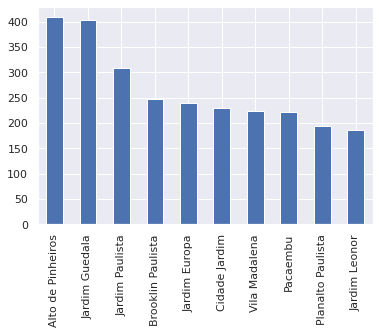

In [ ]:
# Mostraremos a seguir os 10 bairros que têm mais imóveis na cidade de São Paulo a venda. - a partir de um gráfico -
# para isso, iremos primeiramente salvar df["Bairro"].value_counts() numa nova variável.
n_imoveis_bairro = df["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()


In [ ]:
# Agora iremos realizar a média da metragem para cada um dos bairros. (DESAFIO 1)
df.groupby("Bairro").mean()["Metragem"].sort_values()
#ou
df.groupby(['Bairro'])['Metragem'].agg(['mean'])




,mean
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


In [ ]:
# Mostraremos a seguir duas formas de selecionar os dados por bairro. (Desafio 2)
df['Bairro'] 
# ou 
df.Bairro

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [ ]:
# Para conseguirmos ter insights significantes, primeiramente iremos tratar algumas features. 
# A primeira feature escolhida, foi o "Valor".
# Passo 1 -> usar o split() - criando assim uma array com dois elementos, um sendo o sifão e o outro o valor
df["Valor"].str.split() # -> series com separação de todos os elementos. (independente da quantidade)

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [ ]:
# Passo 2 -> observar quantas colunas temos no "DataFrame" criado com cada elemento da separação.
df["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
# Passo 3 -> após a criação do DataFrame acima, iremos observar a coluna 0 para ver o que temos nela.
df["Valor"].str.split(expand=True)[0].unique() # -> devolve todos os elementos únicos de uma coluna. A saída final utilizando a função unique() é um array.
# Feito isso, observarmos que a coluna 0 só tem o sifão.

array(['R$'], dtype=object)

In [ ]:
# Passo 3 -> continuação da observação das colunas do DataFrame criado.
len(df["Valor"].str.split(expand=True)[1].unique()) # -> além de ver o que consta no array criado, iremos observar quantos valores distintos tem..
# Conseguimos saber que a coluna 1 tem 1038 preço distintos.

1038

In [ ]:
# Para finalizar o passo 3, iremos observar agora a coluna 2
df["Valor"].str.split(expand=True)[2].unique()
# Notamos que além mês, possuimos Ano e Dia.
# Isso nos mostra que possivelmente temos dados de aluguel nessa base de dados também.

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
# Passo 4 -> criar novas colunas e nomeá-las. Realizaremos esse passo criando uma nova lista;
df[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = df["Valor"].str.split(expand=True)
# Agora observaremos como está nossa base de dados, após a criação dessas novas colunas;
df.head()
# Notamos na tabela abaixo que obtemos êxito no procedimento desejado.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
# Passo 5 -> Como desejamos ter insights sobre a modalidade de vendas de apartamento no Bairros de São Paulo, e não de aluguel, iremos filtrar...
#...começando vendo se temos vazios..
df["Tipo_anuncio"].isnull() # Caso obtenhamos True, selecionaremos em um array;
df[df["Tipo_anuncio"].isnull()]
df[df["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique() # Para provarmos que deu certo, faremos uso do unique na coluna "Tipo_anuncio"



array([None], dtype=object)

In [ ]:
# Passo 5 -> Acima notamos que só temos uma array[None/Vazio], logo, deu certo.
df_vendas = df[df["Tipo_anuncio"].isnull()] # -> iremos salvar apenas os True
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [ ]:
# Passo 6 -> remoção dos pontos
df_vendas["Valor_anuncio"].str.replace(".","") # -> conseguimos realizar a remoção dos pontos.
df_vendas["Valor_anuncio"].str.replace(".","").astype(float) # -> para alterar o tipo de dados de todas as colunas da moldura de dados.
# Feito isso, iremos salvar o comando acima dentro do DataFrame "df_vendas" adicionando uma nova coluna chamada de "Valor_anuncio_float"
df_vendas["Valor_anuncio_float"] = df_vendas["Valor_anuncio"].str.replace(".","").astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
# Passo 6 -> Observaremos se deu certo.
df_vendas.info()
# Notamos que a coluna "Valor_anuncio_float" foi adicionada com o tipo de dado correto no DataFrame "df_vendas", assim, finalizamos o tratamento
# da coluna requerida.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


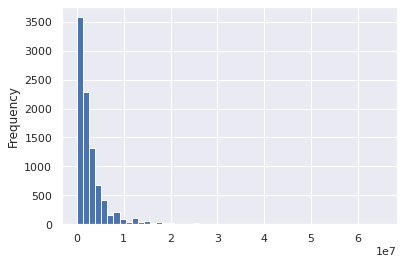

In [ ]:
# Gráficos para analisar o "Valor_anuncio_float"
df_vendas["Valor_anuncio_float"].plot.hist(bins= 50) # -> mostra que entre o valor 1

In [ ]:
# describe() -> usado para visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc.
df_vendas.describe() # apenas a colunas numéricas são observadas nesse metódo
# Para melhor visualização dos valores, iremos mostrar apenas duas casas decimais.
pd.set_option("display.precision", 2)
# ou
pd.set_option("display.float_format", lambda x: "%.2f" % x) # -> aqui dizemos que queremos o formato no tipo float e com duas casas decimais a direita.
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
# Abaixo veremos toda as descrição do DataFrame df_vendas, até os não numéricos
df_vendas.describe(include = "all")
##### INFORMAÇÕES OBTIDAS #####
# Só temos uma cidade(São Paulo) e 697 bairros distintos;
# O bairro mais frequente é o Bairro: Alto de Pinheiros na Rua aparecendo 369 vezes;
# A rua com mais imóveis a venda é a Rua Alberto Faria aparecendo 24 vezes.

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [ ]:
df_vendas[["Rua", "Bairro", "Cidade"]].describe() # -> visualizando apenas os tipos categoricos.

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


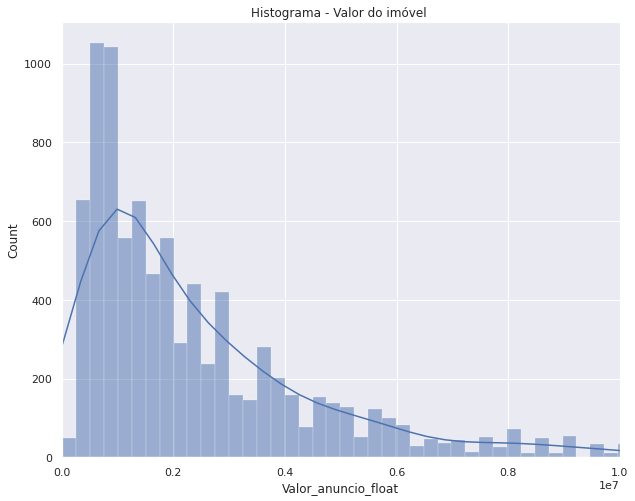

In [ ]:
# Gráfico
plt.figure(figsize=(10, 8)) # -> Estamos configurando o tamanho do gráfico abaixo.
ax = sns.histplot(data = df_vendas, x ="Valor_anuncio_float", kde=True) # -> colocamos o gráfico dentro da variável ax para conseguirmos...
#...setar algumas configurações.
# Abaixamo mostraremos um exemplo:
ax.set_title("Histograma - Valor do imóvel ")
plt.xlim((-50, 10000000)) # -> Estamos plotando nosso gráfico do -50 até os 10 milhões
plt.show() # -> apenas ocultará a mensagem que aparece na plotagem do gráfico
# No gráfico abaixo observamos o calculo da quantidade de bins que colocamos no outro gráfico.
# Também vimos que temos uma curva de comportamento do histograma.

In [ ]:
# Dando continuidade a análise exploratória, agora iremos descobrir o valor do metro quadrado dos imóveis na cidade de São Paulo.
df_vendas["Valor_anuncio_float"] / df_vendas ["Metragem"] # -> feito o calculo agora iremos criar uma nova coluna no DataFrame
df_vendas["Valor_m2"] = df_vendas["Valor_anuncio_float"] / df_vendas ["Metragem"]
df_vendas.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [ ]:
# Criada a nova coluna com o valor do m2 dos imóveis, agora iremos agrupa-las por bairros. E descobrir as médias de cada variável númerica
df_vendas.groupby("Bairro").mean() # -> abaixo segue a análise da média das médias.

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [ ]:
# Como fizemos a média das médias e isso não nos traz um resultado conciso, iremos atrás de mais informações.
df_vendas.groupby("Bairro").sum() # -> estamos realizando a soma de todas as variáveis numéricas


,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25
